<a href="https://colab.research.google.com/github/artiagra/Kaggle-Problems/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [20]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
import io

data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
data.shape

(891, 12)

In [0]:
data.groupby(['Sex','Survived']).size().reset_index(name='Count')

,Sex,Survived,Count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


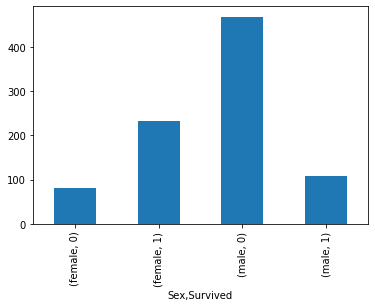

In [0]:
data.groupby(['Sex','Survived']).size().plot(kind='bar')

In [0]:
male_count = data[data['Sex'].isin(['male'])]

In [0]:
male_count.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [0]:
male_count = pd.DataFrame(male_count)

In [0]:
male_count.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [0]:
male_count.shape

(577, 12)

In [0]:
male_count['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [0]:
import numpy as np

y_male = male_count[male_count['Age'] < 18]
y_male['Survived'].value_counts()

0    35
1    23
Name: Survived, dtype: int64

In [0]:

a_male = male_count[male_count['Age'] >= 18]
a_male['Survived'].value_counts()

0    325
1     70
Name: Survived, dtype: int64

In [0]:
male_count[male_count['Age'].isnull()]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

In [0]:
#to get null count : total length of rows - non null count of row

len(male_count) - male_count['Age'].count()

124

In [24]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
data1 = data.fillna(0)

In [38]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [0]:
from sklearn import tree

In [41]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(data1['Sex'])

LabelEncoder()

In [42]:
le.classes_

array(['female', 'male'], dtype=object)

In [43]:
data1['Sex1'] = le.fit_transform(data1['Sex'])
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,1


In [0]:
X = data1[['Sex1','Pclass','Age','SibSp','Parch']]

In [45]:
X.head()

,Sex1,Pclass,Age,SibSp,Parch
0,1,3,22.0,1,0
1,0,1,38.0,1,0
2,0,3,26.0,0,0
3,0,1,35.0,1,0
4,1,3,35.0,0,0


In [0]:
y = data1['Survived']

In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [49]:
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
from google.colab import files
uploaded1 = files.upload()

Saving test.csv to test.csv


In [0]:
import io

test = pd.read_csv(io.BytesIO(uploaded1['test.csv']))

In [104]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
test1 = test.fillna(0)

In [0]:
test1['Sex1'] = le.fit_transform(test1['Sex'])

In [107]:
test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex1
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0


In [108]:
X_test = test1[['Sex1','Pclass','Age','SibSp','Parch']]
test1.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex1'],
      dtype='object')

In [0]:
result = pd.DataFrame(test1['PassengerId'])

In [0]:
y_pred = clf.predict(X_test)

In [110]:
result.keys()

Index(['PassengerId'], dtype='object')

In [0]:
result['Survived'] = y_pred

In [61]:
from sklearn import metrics
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.920314253647587


In [113]:
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [0]:
result.to_csv('result.csv',index=False)

In [0]:
files.download('result.csv')